In [0]:
import requests
from bs4 import BeautifulSoup
import jason

In [0]:
import pandas as pd

####KOSPI200 기업데이터

In [0]:
#### KOSPI200 기업데이터 불러오기 ####
#### 인코딩 에러 해결 ####
data=pd.read_csv('com_list.csv', encoding='euc-kr')
data

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,우리금융지주,316140,기타 금융업,금융지주,2019-02-13,12월,손태승,http://www.woorifg.com/,서울특별시
1,효성중공업,298040,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",-,2018-07-13,12월,김동우/요코타 타케시,http://www.hyosungheavyindustries.com,서울특별시
2,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"권순호, 정경구",http://www.hdc-dvp.com,서울특별시
3,애경산업,18250,기타 화학제품 제조업,"Age 20's,루나, 트리오, 2080치약, 순샘, 제트 등",2018-03-22,12월,채동석,http://www.aekyung.co.kr,서울특별시
4,셀트리온,68270,기초 의약물질 및 생물학적 제제 제조업,"램시마, 트룩시마, 허쥬마",2018-02-09,12월,기우성,http://www.celltrion.com,인천광역시
...,...,...,...,...,...,...,...,...,...
195,삼양홀딩스,70,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,윤재엽,http://www.samyang.com,서울특별시
196,한국테크놀로지그룹,240,기타 금융업,"고무타이어,고무튜브,후랩,알루미늄휠의 제조,판매,임대수익,물품운반용기,포장용기(프라스틱)",1968-12-27,12월,조현식,http://www.hankooktire.com,경기도
197,대한항공,3490,항공 여객 운송업,"여객운송,화물운송,항공기 제조,판매,정비수리/기내식 제조판매,면세품 판매",1966-03-18,12월,"조원태, 우기홍",http://www.koreanair.com,서울특별시
198,유한양행,100,의약품 제조업,"의약품(삐콤씨,알마겔,세파졸린주사,아코텍스주사,이세파신,신생아호흡곤란치료제 등),생...",1962-11-01,12월,대표이사 이정희,http://www.yuhan.co.kr,서울특별시


In [0]:
#### 필요 정보만 간추리기 ####
data=data[['회사명','종목코드','업종']]
data

,회사명,종목코드,업종
0,우리금융지주,316140,기타 금융업
1,효성중공업,298040,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업"
2,HDC현대산업개발,294870,건물 건설업
3,애경산업,18250,기타 화학제품 제조업
4,셀트리온,68270,기초 의약물질 및 생물학적 제제 제조업
...,...,...,...
195,삼양홀딩스,70,기타 금융업
196,한국테크놀로지그룹,240,기타 금융업
197,대한항공,3490,항공 여객 운송업
198,유한양행,100,의약품 제조업


In [0]:
#### 종목코드 리스트화 ####
#### 6자리로 형식 통일화 ####

a=list(data['종목코드'])   #{:06}
code_list=[]
for i in a:
  code_list.append('{:06}'.format(i))
#   if i>=10 and i<100:
#     i.zfill(4)
#   if i>=100 and i<1000:
#     i.zfill(3)
#   if i>=1000 and i<10000:
#     i.zfill(2)
#   if i>=10000 and i<100000:
#     i.zfill(1)
code_list


['316140',
 '298040',
 '294870',
 '018250',
 '068270',
 '285130',
 '282330',
 '035720',
 '271560',
 '251270',
 '267250',
 '241560',
 '207940',
 '026960',
 '079550',
 '214320',
 '028260',
 '018260',
 '204320',
 '192400',
 '027410',
 '192820',
 '185750',
 '064350',
 '170900',
 '161890',
 '161390',
 '007070',
 '145990',
 '031430',
 '047810',
 '071840',
 '139480',
 '138930',
 '020150',
 '011210',
 '081660',
 '057050',
 '128940',
 '060980',
 '032830',
 '088350',
 '120110',
 '115390',
 '052690',
 '114090',
 '034730',
 '000080',
 '111770',
 '108670',
 '105630',
 '035420',
 '105560',
 '103140',
 '011070',
 '032640',
 '051600',
 '097950',
 '028670',
 '096760',
 '096770',
 '029780',
 '093370',
 '093050',
 '090430',
 '023530',
 '086280',
 '086790',
 '079430',
 '073240',
 '079160',
 '014830',
 '078930',
 '034220',
 '019680',
 '024110',
 '035250',
 '071050',
 '036570',
 '069960',
 '069620',
 '069260',
 '009240',
 '066570',
 '064960',
 '055550',
 '021240',
 '051900',
 '051910',
 '047040',
 '047050',

In [0]:
#### 변환된 종목코드 다시 데이터프레임으로 만들기 ####
ss=pd.DataFrame(code_list, columns=['code'])
ss

,code
0,316140
1,298040
2,294870
3,018250
4,068270
...,...
195,000070
196,000240
197,003490
198,000100


In [0]:
#### 기업별 업종 분류 정보 데이터프레임화 ####

df_data=pd.concat([data[['회사명', '업종']], ss], axis=1)
df_data

,회사명,업종,code
0,우리금융지주,기타 금융업,316140
1,효성중공업,"전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업",298040
2,HDC현대산업개발,건물 건설업,294870
3,애경산업,기타 화학제품 제조업,018250
4,셀트리온,기초 의약물질 및 생물학적 제제 제조업,068270
...,...,...,...
195,삼양홀딩스,기타 금융업,000070
196,한국테크놀로지그룹,기타 금융업,000240
197,대한항공,항공 여객 운송업,003490
198,유한양행,의약품 제조업,000100


#### 주가 데이터 크롤링

In [0]:
from tqdm.notebook import tqdm

resultList = []

for code in tqdm(code_list):
  for page in range(9):     #### 눈으로 url tag 정보 확인하여 6개월 치 페이지 수 확인함 ####
    url='https://m.stock.naver.com/api/item/getPriceDayList.nhn'

    params = {
            'code': code,
            'pageSize':20,
            'page':page+1
            }

    header = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
              'referer': 'https://m.stock.naver.com/item/main.nhn'}


    resp=requests.get(url, params, headers=header)

    resp.text

    resp_dic = json.loads(resp.text)


    
    for stocks in resp_dic['result']['list']:

      stocks['code']=code
      resultList.append(stocks)
      


  #dt = 날짜
  #aq = 거래량
  #ncv = 종가
  #cr = 등락률



In [0]:
resultList

[{'aq': 181757,
  'code': '316140',
  'cr': -1.2200000286102295,
  'cv': -120,
  'dt': '20200610',
  'hv': 9850.0,
  'lv': 9720.0,
  'ncv': 9730,
  'ov': 9850.0,
  'rf': '5'},
 {'aq': 2476324,
  'code': '316140',
  'cr': -1.9900497,
  'cv': -200,
  'dt': '20200609',
  'hv': 10100.0,
  'lv': 9770.0,
  'ncv': 9850,
  'ov': 10000.0,
  'rf': '5'},
 {'aq': 2200043,
  'code': '316140',
  'cr': 0.0,
  'cv': 0,
  'dt': '20200608',
  'hv': 10400.0,
  'lv': 10000.0,
  'ncv': 10050,
  'ov': 10300.0,
  'rf': '3'},
 {'aq': 2363632,
  'code': '316140',
  'cr': 0.5,
  'cv': 50,
  'dt': '20200605',
  'hv': 10200.0,
  'lv': 9910.0,
  'ncv': 10050,
  'ov': 10000.0,
  'rf': '2'},
 {'aq': 3975345,
  'code': '316140',
  'cr': -3.3816425,
  'cv': -350,
  'dt': '20200604',
  'hv': 10750.0,
  'lv': 9960.0,
  'ncv': 10000,
  'ov': 10500.0,
  'rf': '5'},
 {'aq': 4612618,
  'code': '316140',
  'cr': 6.7010309,
  'cv': 650,
  'dt': '20200603',
  'hv': 10350.0,
  'lv': 9870.0,
  'ncv': 10350,
  'ov': 9900.0,
  'rf

In [0]:
#### KOSPI200 모든 종목(기업)에 대한 주가 정보 데이터프레임 ####

sample_df = pd.DataFrame(resultList)
sample_df.head()
sample_df.tail()

,dt,ncv,rf,cv,cr,ov,hv,lv,aq,code
35995,20190924,146000,2,2000,1.388889,144500.0,147000.0,144000.0,59692,000120
35996,20190923,144000,2,1500,1.052631,143500.0,145000.0,143000.0,49333,000120
35997,20190920,142500,2,1500,1.063830,141000.0,143000.0,140000.0,43555,000120
35998,20190919,141000,5,-2500,-1.742160,143000.0,144000.0,140000.0,28886,000120
35999,20190918,143500,2,3500,2.500000,140500.0,144000.0,140000.0,62522,000120


In [0]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      36000 non-null  object 
 1   ncv     36000 non-null  int64  
 2   rf      36000 non-null  object 
 3   cv      36000 non-null  int64  
 4   cr      36000 non-null  float64
 5   ov      36000 non-null  float64
 6   hv      36000 non-null  float64
 7   lv      36000 non-null  float64
 8   aq      36000 non-null  int64  
 9   code    36000 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [0]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     200 non-null    object
 1   종목코드    200 non-null    int64 
 2   업종      200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [0]:
#### 크롤링하여 만든 주가정보 데이터프레임과 기업별 업종분류 데이터프레임머지 ####
dataframe=sample_df.merge(df_data, how='outer', on='code')
dataframe

,dt,ncv,rf,cv,cr,ov,hv,lv,aq,code,회사명,업종
0,20200610,9730,5,-120,-1.220000,9850.0,9850.0,9720.0,181757,316140,우리금융지주,기타 금융업
1,20200609,9850,5,-200,-1.990050,10000.0,10100.0,9770.0,2476324,316140,우리금융지주,기타 금융업
2,20200608,10050,3,0,0.000000,10300.0,10400.0,10000.0,2200043,316140,우리금융지주,기타 금융업
3,20200605,10050,2,50,0.500000,10000.0,10200.0,9910.0,2363632,316140,우리금융지주,기타 금융업
4,20200604,10000,5,-350,-3.381642,10500.0,10750.0,9960.0,3975345,316140,우리금융지주,기타 금융업
...,...,...,...,...,...,...,...,...,...,...,...,...
35995,20190924,146000,2,2000,1.388889,144500.0,147000.0,144000.0,59692,000120,CJ대한통운,도로 화물 운송업
35996,20190923,144000,2,1500,1.052631,143500.0,145000.0,143000.0,49333,000120,CJ대한통운,도로 화물 운송업
35997,20190920,142500,2,1500,1.063830,141000.0,143000.0,140000.0,43555,000120,CJ대한통운,도로 화물 운송업
35998,20190919,141000,5,-2500,-1.742160,143000.0,144000.0,140000.0,28886,000120,CJ대한통운,도로 화물 운송업


In [0]:
# dataframe.to_csv('dataframe.csv', index=False)

In [0]:
# dataframe = pd.read_csv('dataframe.csv')

#### 데이터분석

In [0]:
dataframe.tail()

,dt,ncv,rf,cv,cr,ov,hv,lv,aq,code,회사명,업종
35995,20190924,146000,2,2000,1.388889,144500.0,147000.0,144000.0,59692,000120,CJ대한통운,도로 화물 운송업
35996,20190923,144000,2,1500,1.052631,143500.0,145000.0,143000.0,49333,000120,CJ대한통운,도로 화물 운송업
35997,20190920,142500,2,1500,1.063830,141000.0,143000.0,140000.0,43555,000120,CJ대한통운,도로 화물 운송업
35998,20190919,141000,5,-2500,-1.742160,143000.0,144000.0,140000.0,28886,000120,CJ대한통운,도로 화물 운송업
35999,20190918,143500,2,3500,2.500000,140500.0,144000.0,140000.0,62522,000120,CJ대한통운,도로 화물 운송업


In [0]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dataframe.shape

(36000, 12)

In [0]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36000 entries, 0 to 35999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      36000 non-null  object 
 1   ncv     36000 non-null  int64  
 2   rf      36000 non-null  object 
 3   cv      36000 non-null  int64  
 4   cr      36000 non-null  float64
 5   ov      36000 non-null  float64
 6   hv      36000 non-null  float64
 7   lv      36000 non-null  float64
 8   aq      36000 non-null  int64  
 9   code    36000 non-null  object 
 10  회사명     36000 non-null  object 
 11  업종      36000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 3.6+ MB


In [0]:
#### 업종별 등락률을 모두 합하여 6개월 간 업정별 주가 상승 및 하락률 확인 ####
g_data=dataframe[['cr', '업종']].groupby(['업종'], as_index=False).sum()
g_data

,업종,cr
0,1차 비철금속 제조업,-13.988311
1,1차 철강 제조업,-76.173829
2,가구 제조업,22.995492
3,가전제품 및 정보통신장비 소매업,2.301393
4,건물 건설업,-43.179130
...,...,...
64,항공 여객 운송업,14.839596
65,"항공기,우주선 및 부품 제조업",-73.647658
66,해상 운송업,-8.408273
67,화학섬유 제조업,-36.143563


In [0]:
#### 주가 상승률 상위 5종과 하위 5종 확인 ####
g_data = g_data.sort_values(['cr'], ascending=False)
top_data = g_data.iloc[:5]
bottom_data = g_data.iloc[-5:]
bottom_data

,업종,cr
65,"항공기,우주선 및 부품 제조업",-73.647658
47,자동차 신품 부품 제조업,-74.608359
1,1차 철강 제조업,-76.173829
33,석유 정제품 제조업,-77.217641
13,기타 금융업,-159.443950


In [0]:
data_df_fin = pd.concat([top_data, bottom_data], axis = 0)
data_df_fin

,업종,cr
44,의약품 제조업,557.012091
11,기초 의약물질 및 생물학적 제제 제조업,142.704756
49,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",124.160758
18,기타 화학제품 제조업,113.108784
25,반도체 제조업,96.494427
65,"항공기,우주선 및 부품 제조업",-73.647658
47,자동차 신품 부품 제조업,-74.608359
1,1차 철강 제조업,-76.173829
33,석유 정제품 제조업,-77.217641
13,기타 금융업,-159.443950


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.

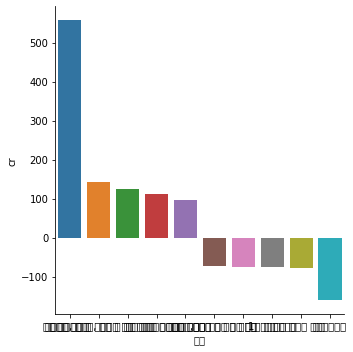

In [0]:
#### 시각화 ####
g = sns.factorplot(x='업종', y='cr', data = data_df_fin, kind = 'bar')